# 230711_오한나

## 기초통계


+ 표준화 : 분포를 바꾼다, 정규화 : 범위를 바꾼다
+ 정규분포 
    - 정규분포에서는 중간값과 평균이 같다
+ 가설
    - 항상 분석 전 가설을 세우고 검증하는 방향으로 분석한다 
    - 귀무가설(영가설-Null, H1)
        * 가설검정의 대상
        * 어떤 가설을 세울땐 영가설을 기준으로 
        * 주장하고자 하는 주장의 반대로 세운다 
        * ex. "지구는 둥글다"를 주장하고 싶으면 "지구는 평평하다"를 증명-기각하기 위해 증명(지구가 평평하지 않은 증거들 제시)
        * 기각하는 쪽이 증명할 수 있는 힘이 강하다 
    - 대립가설(H0)
        * 입증하려는 가설 (= 내 의견); 통계분석할때는 영가설이 내 의견이 될 수도 있음
    - 증명할수있음(+) + 반박할수있음(-) = 합이 양수면 채택 (약간의 차이가 있다고 채틱할 수 있는건 아님. 기준이 있음)
        * 가설을 채택한다고 참이라는 뜻은 아님
        * 입증하지 못한 증거들이 있을 수도 있음
        * 가설을 기각한다고해서 거짓이라는 뜻도 아님
    - 오류 : 제1종오류, 제2종오류 - 구분/왜틀렸는지 판단
+ 유의수준 (p-value)
    - 제 1종 오류를 범할 확률 (귀무가설이 맞는데 기각할 확률) : 주로 0.05 사용 (종종 0.01, 0.001 사용 - 엄격하게)
    - p-value를 너무 낮게하면 기각을 너무하게 되므로 그렇게 좋진않을 수 있다 
+ T-test
    - T 분포 사용
    - 두 그룹간 → T-test
    - 여러 그룹간 → ANOVA (또는 T-test를 여러번하고 실행횟수만큼 나누기)
    - 조건
        * 둘 다 양적 변수 (연속형, 스칼라 변수)
        * 정규분포를 따름 (정규분포를 따르지않으면 성립을 하지 않음 → 표준화과정이 필요함)
        * 등분산성을 충족 
        * 모두 만족해야함. 하나라도 만족하지않으면 T-test를 할 수 없음 
        * 표본이 30개 이상이면(표본이 충분히 많으면) 정규분포와 유사한 결과를 보임
        * 두 그룹 데이터가 분포가 같으면 등분산성을 만족함
    - 절차
        * 독립 표본인가? → 연속형인가? → 정규성과 등분산성을 만족하는가? → T-test
        * 범주형인가? 이때 범주형이란 성별 0, 1과 같은 데이터. 이름, 주소 이런건 안됨 
        * 이론적으론 절차를 따르지만 실제 현장에선 절차를 따르진 않음
            + t-test 쓰다가 pvalue가 0.05에 걸쳐있을때 그때 써봄 (그러나 산업적으론... // 선택사항)
            + 또는 학술적인 분야에서 엄격하게 따짐 

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
# sklearn 폴더에 datasets 파일이 있고 그 속에 load_iris 함수가 있는 것 

d = load_iris()

In [3]:
df_lris = pd.DataFrame(data=d.data, columns = d.feature_names)

In [4]:
df_lris['species'] = [d.target_names[x] for x in d.target]

In [5]:
df_lris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
df_lris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [7]:
# setosa와 versicolor의 sepal length가 유의미한 차이가 있는가?

m = df_lris['species'] == 'setosa'
m2 = df_lris['species'] == 'versicolor'

In [8]:
setosa = df_lris[m]['sepal length (cm)']
versicolor = df_lris[m2]['sepal length (cm)']

* 이전까지는 versicolor의 평균이 더 높다라고 이야기 했으나 어느정도 차이가 있어야 차이가 난다고 말할 수 있는지 이야기할 수 없다. 
* 이제는 t-test로 분석

In [9]:
from scipy import stats

In [10]:
ttest = stats.ttest_ind(setosa, versicolor)
ttest

Ttest_indResult(statistic=-10.52098626754911, pvalue=8.985235037487079e-18)

* 바로 결과 통계값이 나온다 
    - p-value=8.98...e-18 < 0.05
    - t-test 귀무가설 : 두 그룹의 값들은 서로 차이가 나지 않는다. 
    - p-value가 0.05보다 작으므로 기각해야하므로, 통계량이 유의미하다.

In [11]:
ttest.pvalue

8.985235037487079e-18

In [12]:
ttest.statistic

-10.52098626754911

* 근데 정규성을 만족하는지, 등분산성을 만족하는지 검사를 안함
* 이제는 검사를 하면서 t-test 진행

In [ ]:
# 정규성 검사

In [13]:
stats.shapiro(setosa) # pvalue=0.45

ShapiroResult(statistic=0.9776982069015503, pvalue=0.4595010578632355)

In [14]:
stats.shapiro(versicolor) # pvalue=0.46

ShapiroResult(statistic=0.9778357148170471, pvalue=0.4647378921508789)

* 귀무가설 : 정규성을 만족한다. 
    - pvalue > 0.05 이므로 귀무가설을 기각할 수 없으므로, 정규성을 만족한다. 

In [15]:
# 등분산성 검사
# ks_2samp : 2 그룹이 있는데 두 그룹이 같은 분포에서 유래했는지 알아보는 검사 

stats.ks_2samp(setosa, versicolor)

KstestResult(statistic=0.78, pvalue=2.807570962237254e-15, statistic_location=5.4, statistic_sign=1)

* 귀무가설 : 두 분포는 서로 다른 분포에서 유래했다. 
    - pvalue < 0.05 이므로, 귀무가설을 기각하여 두 분포는 서로 다른 분포에서 유래하지 않았다. (= 서로 같은 분포다 = 등분산성을 만족한다)

In [16]:
# t-test 별 p-value 차이 한 번 보기

# t-test
stats.ttest_ind(setosa, versicolor)

Ttest_indResult(statistic=-10.52098626754911, pvalue=8.985235037487079e-18)

In [17]:
# wilcoxon
stats.wilcoxon(setosa, versicolor)

C:\ProgramData\anaconda3\lib\site-packages\scipy\stats\_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


WilcoxonResult(statistic=19.0, pvalue=3.479904217643913e-09)

In [18]:
# paired t-test
stats.ttest_rel(setosa, versicolor)

TtestResult(statistic=-10.145899475747328, pvalue=1.2419145491292472e-13, df=49)

In [19]:
# mann-whitneyu
stats.mannwhitneyu(setosa, versicolor)

MannwhitneyuResult(statistic=168.5, pvalue=8.34582714594069e-14)

### 상관관계 분석 

* x가 늘어날수록 y도 늘어난다. -> 양의 상관관계 (기울기 양수)
* x가 늘어날때 y는 줄어든다. -> 음의 상관관계 (기울기 음수)
* 두 그룹이 있을때 각각의 요소 증감에 따라 어떤 차이를 보이는가 어떤 상관관계가 있을까 있다면 어떻게 표현할 수 있을까 
* 이중 우리는 1차 상관관계에 대해 알아봄 (양인지 음인지 상관없는지, 얼마나 있는지)

* correlation = r-value
    - 0에 가까우면 가까울수록 관계가 없다. 
    - 1에 가까울수록 양의 상관 (-1에 가까울수록 음의 상관)
    - pvalue는 0.05 미만이어야 한다.

In [20]:
# spearmanr : 카테고리컬 데이터 & 모든 데이터가 정규성을 만족하진 않을때 사용 
stats.spearmanr(setosa, versicolor)

SignificanceResult(statistic=-0.1016368495635701, pvalue=0.48247619884195925)

In [21]:
# pearsonr : 수치형 데이터 & 모든 데이터가 정규성을 만족할때 사용 
stats.pearsonr(setosa, versicolor)
# rvalue=0.08, pvalue=0.57 # 상관관계가 거의 없다 

PearsonRResult(statistic=-0.0808497270175701, pvalue=0.5767425210865983)

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

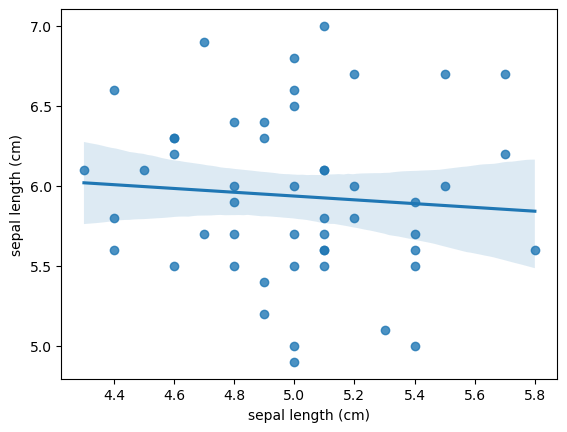

In [23]:
sns.regplot(x = setosa, y = versicolor)
plt.show()

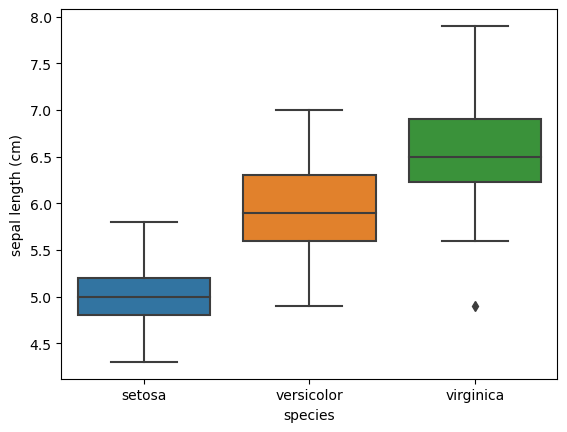

In [24]:
sns.boxplot(data=df_lris, x='species', y='sepal length (cm)')
plt.show()

## 데이터 시각화

* matplotlib
    - 파이썬 대다수는 이것에 뿌리를 두고있음
    - 계속 함수를 추가해야하는 불편함이 있음 
    - 그래프
        + bar
            - 색 마음대로 바꾸면 안된다 (의미가 있어야함)
            - 모두 같은 그룹이라면 같은 색으로 해야한다 (색이 다르면 다른 그룹으로 생각함)
* seaborn
    - matplotlib보다 쓰기 간편하고 이쁨
* Plotly
    - 인터렉티브 플롯. 동적 플롯. 반응형 
    - 별도의 설치 필요 

### bar

In [25]:
# 주피터에서만 작동하는 매직코드
# 다른 곳에 배포 안하고 나만 보고 싶고 show하기 귀찮으면 이거 입력해두면 
# 해당 세션 동안은 보여지긴함 
%matplotlib inline

In [26]:
import matplotlib.pyplot as plt

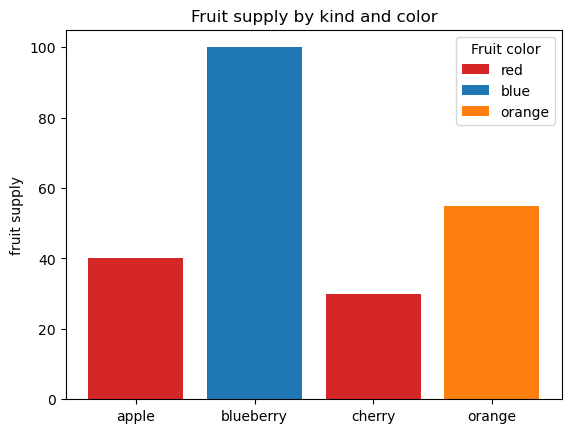

In [27]:
fig, ax = plt.subplots() # 그래프를 그릴때 레이아웃을 정하는 것 (구간 나누기, 사이즈 변경 등)

fruits = ['apple', 'blueberry', 'cherry', 'orange']
counts = [40, 100, 30, 55]
bar_labels = ['red', 'blue', '_red', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors) # 그래프 그리기
# 원래 plt.bar()
# ax가 그래프가 들어갈 구간

# 함수를 계속 중첩시켜 그래프를 완성함 
ax.set_ylabel('fruit supply')
ax.set_title('Fruit supply by kind and color')
ax.legend(title='Fruit color') # 범례

plt.show() # 그래프를 출력 # 적지 않으면 그래프가 나오지않음 

<BarContainer object of 4 artists>

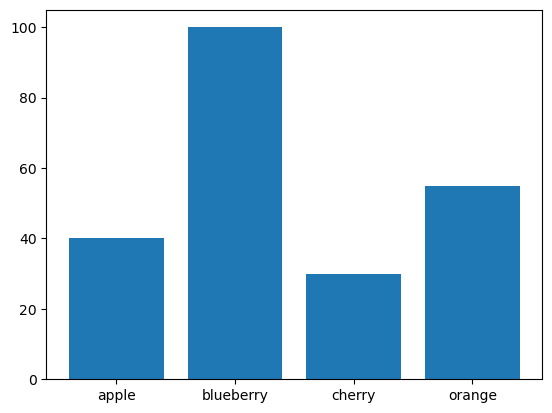

In [28]:
# bar에서 필수적인 요소 
# 위의 나머지코드들은 그냥 스타일적 요소 

plt.bar(fruits, counts)

### pie
* 항상 수량 데이터만 넣음
* 점유율 등을 보고자 할 때 활용

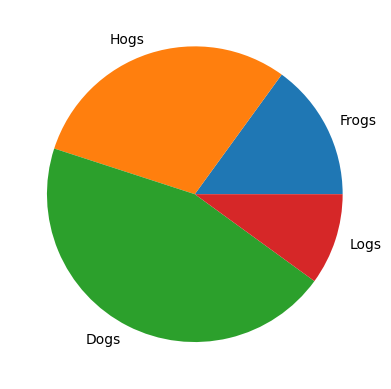

In [29]:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

plt.show()

In [30]:
import numpy as np

### line

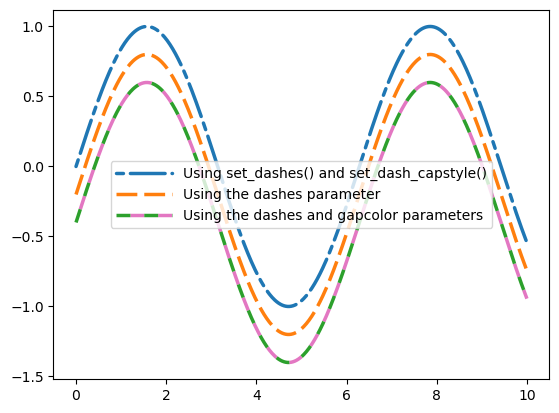

In [31]:
x = np.linspace(0, 10, 500)
y = np.sin(x)

plt.rc('lines', linewidth=2.5)
fig, ax = plt.subplots()

# Using set_dashes() and set_capstyle() to modify dashing of an existing line.
line1, = ax.plot(x, y, label='Using set_dashes() and set_dash_capstyle()')
line1.set_dashes([2, 2, 10, 2])  # 2pt line, 2pt break, 10pt line, 2pt break.
line1.set_dash_capstyle('round')

# Using plot(..., dashes=...) to set the dashing when creating a line.
line2, = ax.plot(x, y - 0.2, dashes=[6, 2], label='Using the dashes parameter')

# Using plot(..., dashes=..., gapcolor=...) to set the dashing and
# alternating color when creating a line.
line3, = ax.plot(x, y - 0.4, dashes=[4, 4], gapcolor='tab:pink',
                 label='Using the dashes and gapcolor parameters')

ax.legend(handlelength=4)
plt.show()

## seaborn

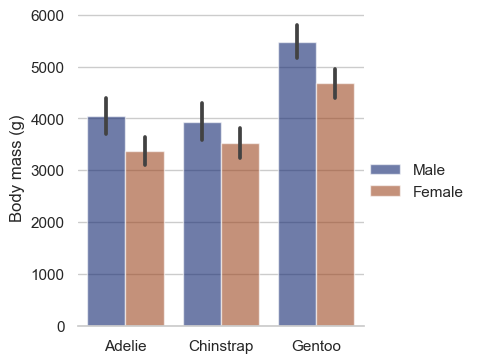

In [32]:
import seaborn as sns
sns.set_theme(style="whitegrid")

penguins = sns.load_dataset("penguins")

# Draw a nested barplot by species and sex
# catplot : 카테고리 비교를 위한 플롯 
# kind : 어떤 그래프를 그릴 것인가 (이건 엄밀히 말하면 캔들바 플롯)
# hue : 레전드에 표시되는 그룹 분류 (다른 곳에서는 color로 표시하기도 함)
# errorbar : 초의 심지 모양
# palette="dark"은 기본값이라 안적어도 되긴함. 팔레드 많음. 다른거 해도 됨 
# alpha : 투명도 (0.6 ; 파이썬은 소수점 생략해도 됨 .6); 60% 투명도
# height : 높이 (상대값)

g = sns.catplot(
    data=penguins, kind="bar",
    x="species", y="body_mass_g", hue="sex",
    errorbar="sd", palette="dark", alpha=.6, height=4
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")

In [33]:
penguins.head(2)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female


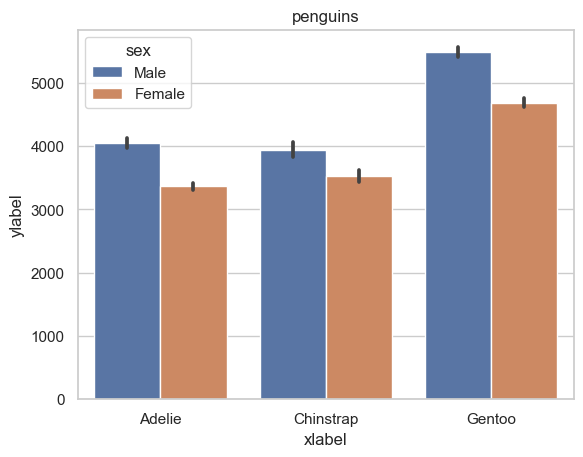

In [34]:
sns.barplot(data=penguins, x='species', y='body_mass_g', hue='sex')
plt.xlabel('xlabel')
plt.ylabel('ylabel')
plt.title('penguins')
plt.show()

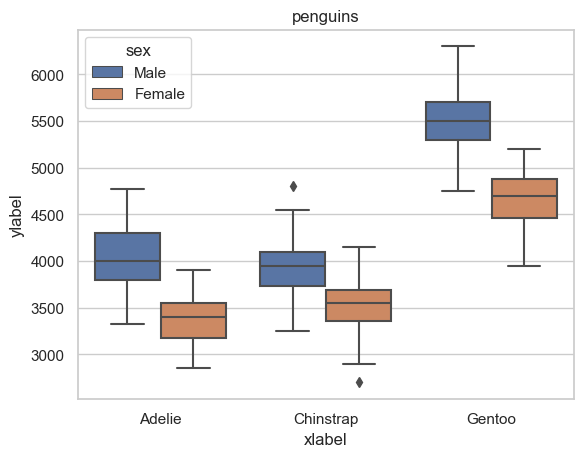

In [35]:
# bar를 box로 바꿈 
sns.boxplot(data=penguins, x='species', y='body_mass_g', hue='sex')
plt.xlabel('xlabel')
plt.ylabel('ylabel')
plt.title('penguins')
plt.show()

## 실습
1. 평균 마력 이상/미만인 대상을 구분해서 두 그룹의 차이가 있는지 통계검정과 시각화를 해 주세요 

In [69]:
# 자동차 데이터 

mpg = sns.load_dataset('mpg')

In [70]:
mpg.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320


In [71]:
m = mpg['horsepower'] >= mpg['horsepower'].mean()

horsepower_high = mpg[m]['horsepower']
horsepower_low = mpg[-m]['horsepower']

In [72]:
horsepower_low.unique()

# nan값이 존재 -> 전처리 필요

array([ 95.,  97.,  85.,  88.,  46.,  87.,  90.,  nan, 100.,  72.,  86.,
        70.,  76.,  65.,  69.,  60.,  80.,  54.,  92.,  94.,  49.,  75.,
        91.,  67.,  83.,  78.,  52.,  61.,  93.,  96.,  71.,  98.,  53.,
        81.,  79., 102.,  68.,  58.,  89.,  63.,  48.,  66., 103.,  77.,
        62.,  84.,  64.,  74.,  82.])

t-test는 평균, 중간값에 민감하게 반응함 <br>
얼마나 멀리 떨어졌냐가 중요함. 그렇기때문에 함부로 0으로 바꾸면 안됨 <br>
t-test의 경우에는 삭제 또는 중간값으로 변경해주어야하는데, <br>
해당 데이터는 데이터수가 많아서 삭제해도 무관하긴하지만 <br>
이번에는 중간값으로 변경해주도록 함 <br>

In [73]:
horsepower_low.fillna(horsepower_low.median(), inplace=True)

C:\Users\BIG2-003-008\AppData\Local\Temp\ipykernel_2156\513176763.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  horsepower_low.fillna(horsepower_low.median(), inplace=True)


In [74]:
horsepower_low.isnull().sum()

0

In [75]:
stats.shapiro(horsepower_high)

ShapiroResult(statistic=0.9209045171737671, pvalue=2.833129997270589e-07)

In [76]:
stats.shapiro(horsepower_low)

ShapiroResult(statistic=0.9625973701477051, pvalue=4.20913556808955e-06)

In [77]:
# 등분산성 검사
# 같은 모집단에서 추출했으므로 사실 검사를 안해도 등분산성을 만족함
# 같은 모집단에서 추출했으므로 등분산성을 만족함 

stats.ks_2samp(horsepower_high, horsepower_low)

# pvalue < 0.5 이므로 등분산성은 만족함 

KstestResult(statistic=1.0, pvalue=4.119561434994082e-113, statistic_location=103.0, statistic_sign=-1)

In [ ]:
# t-test

In [78]:
# 정규성은 만족하지 않고, 등분산성은 만족함. 그러나 샘플수가 충분히 많기때문에 정규성을 만족한다고도 할 수 있음 

stats.ttest_ind(horsepower_high, horsepower_low)

Ttest_indResult(statistic=28.043542427958233, pvalue=4.209107348728462e-96)

In [79]:
# Welch’s T-test
stats.ttest_ind(horsepower_high, horsepower_low, equal_var= False)

Ttest_indResult(statistic=23.397395063687924, pvalue=2.850117804035665e-56)

In [80]:
# 정규성 불만족 -> Mann-Whitney U test
stats.mannwhitneyu(horsepower_high, horsepower_low)

MannwhitneyuResult(statistic=37000.0, pvalue=1.6636479260185042e-62)

In [81]:
# pvalue < 0.05 이므로, 두 그룹간 유의미한 차이가 있다고 말할 수 있다. 

In [82]:
mpg['category'] = m

In [83]:
mpg['category'] = mpg['category'].apply(lambda x: 'over' if x else 'under')

<Axes: xlabel='category', ylabel='horsepower'>

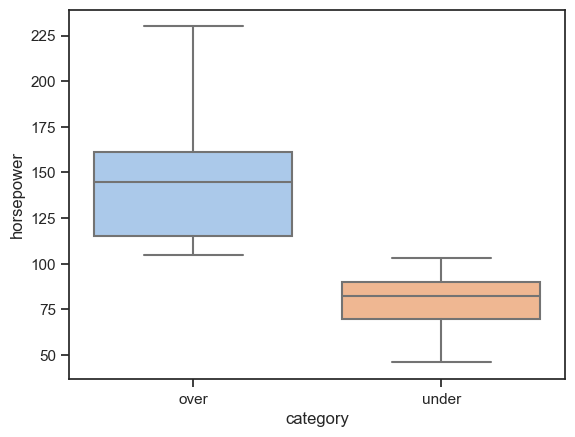

In [84]:
sns.boxplot(data=mpg, x='category', y='horsepower')

### boxplot 이외의 plot

* boxplot만 쓰는 것 보단 아래의 plot을 써주는 것이 좋음 
    - boxenplot
    - violinplot
    - stripplot

<Axes: xlabel='category', ylabel='horsepower'>

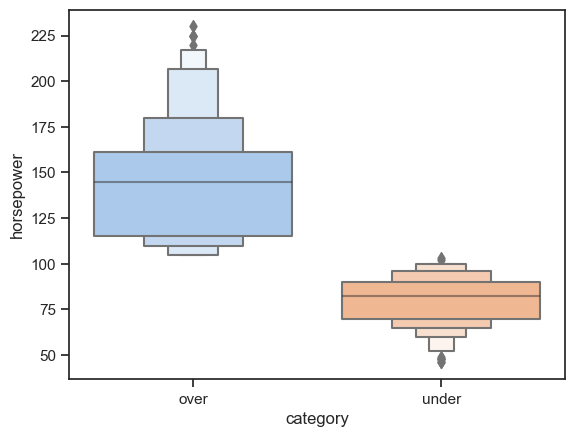

In [85]:
sns.boxenplot(data=mpg, x='category', y='horsepower')

# 폭이 넓은 건은 밀도가 높은 것을 의미
# 폭이 좁은 건은 밀도가 낮은 것을 의미
# 수염 부분은 없음
# 장점 : 밀도를 알 수 있다

<Axes: xlabel='category', ylabel='horsepower'>

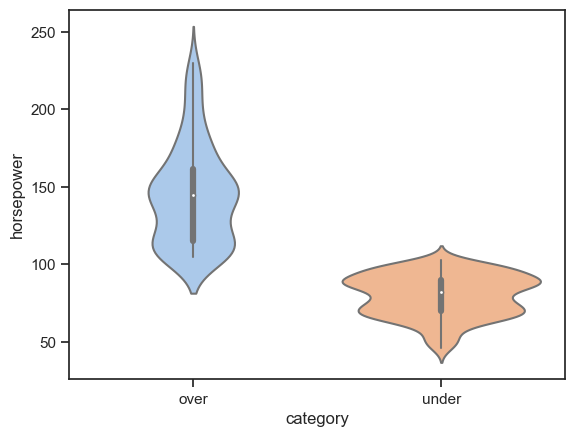

In [86]:
sns.violinplot(data=mpg, x='category', y='horsepower')

# 장점 : 밀도를 곡선으로 표시하여 좀더 세밀하게 볼 수 있음
# 단점 : 가느다란 부분이 조금 왜곡되어있다 

<Axes: xlabel='category', ylabel='horsepower'>

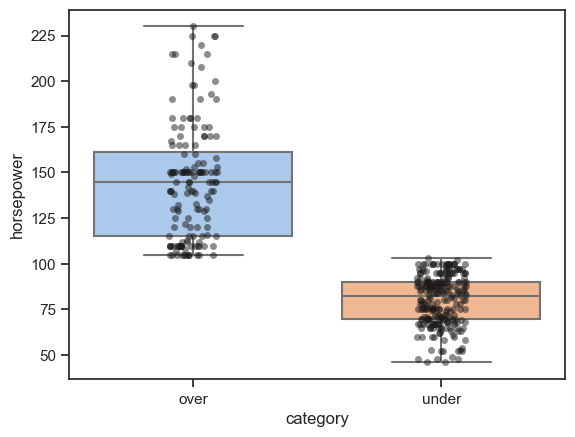

In [87]:
# boxplot에 stripplot을 겹쳐서 그리기

sns.boxplot(data=mpg, x='category', y='horsepower')
sns.stripplot(data=mpg, x='category', y='horsepower', color='k', alpha=.5)

# 장점 : 밀도 추적이 됨
# 단점 : 밀도가 부피가 아니라 점을 다닥다닥으로 보여주다보니 직관적으로 보기 힘들다. 또한 사이즈가 작으면 정말 알아보기가 힘들다 

In [88]:
import statannot

In [89]:
from statannot import add_stat_annotation

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

over v.s. under: t-test independent samples with Bonferroni correction, P_val=2.847e-94 stat=2.773e+01


(<Axes: xlabel='category', ylabel='horsepower'>,
 [<statannot.StatResult.StatResult at 0x25233f75c60>])

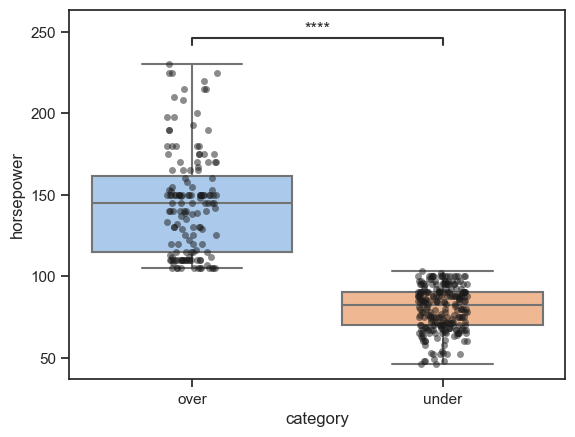

In [90]:
f1 = sns.boxplot(data=mpg, x='category', y='horsepower')
f2 = sns.stripplot(data=mpg, x='category', y='horsepower', color='k', alpha=.5)

add_stat_annotation(f1, data=mpg, x='category', y='horsepower',
                    box_pairs=[(('over'), ('under'))],
                   test='t-test_ind', text_format='star', loc='inside', verbose=2)

* 이것을 가지고 함수를 만들어봅시다 
    - 공통으로 쓰인것을 찾기 

In [91]:
# user_df : 입력할 데이터 프레임 이름
# col : x축 coliumn 이름
# value : y축 value 이름
# group1, group2 : col 기준으로 분류된 이름

def ttest_auto(user_df, col, value, group1, group2):
    f1 = sns.boxplot(data=user_df, x=col, y=value)
    f2 = sns.stripplot(data=user_df, x=col, y=value, color='k', alpha=.5)

    add_stat_annotation(f1, data=user_df, x=col, y=value,
                        box_pairs=[((group1), (group2))],
                       test='t-test_ind', text_format='star', loc='inside', verbose=2)
    
    plt.show()

In [92]:
penguins.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


* penguins 데이터프레임에서 Adelie과 Gentoo 그룹간의 체중 차이가 나는지 안나는지를 ttest_auto 함수를 이용해 표현해보자

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Adelie v.s. Gentoo: t-test independent samples with Bonferroni correction, P_val=8.031e-68 stat=-2.361e+01


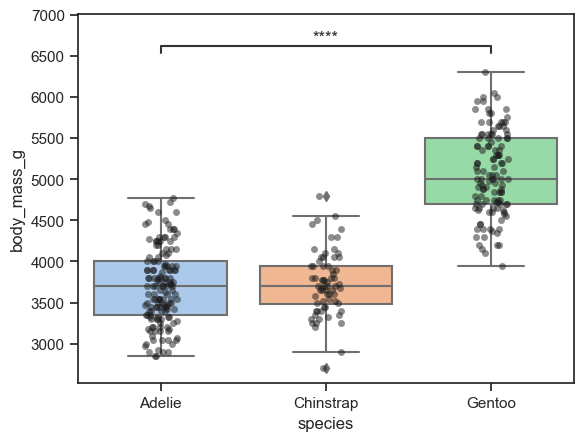

In [93]:
ttest_auto(penguins, 'species', 'body_mass_g', 'Adelie', 'Gentoo')

In [94]:
penguins['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [100]:
penguins['body_mass_g'].isnull().sum()

# 결측치가 존재함. 전처리 필요 (#원래는 2였음)

0

In [101]:
# 결측치는 자기 자신과 같지 않다는 것을 이용

In [102]:
penguins['body_mass_g'] = [penguins['body_mass_g'].median() if w != w else w for w in penguins['body_mass_g']]

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Adelie v.s. Gentoo: t-test independent samples with Bonferroni correction, P_val=2.984e-67 stat=-2.339e+01


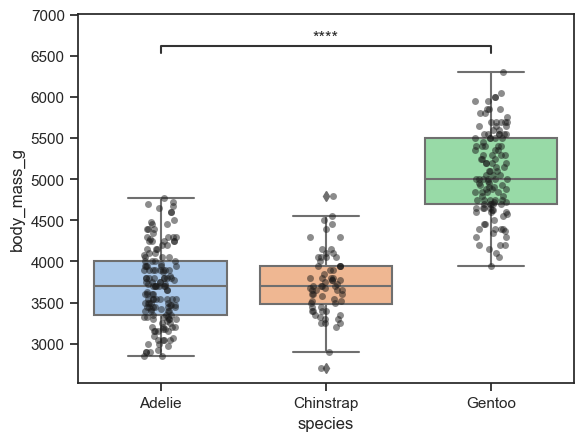

In [103]:
ttest_auto(penguins, 'species', 'body_mass_g', 'Adelie', 'Gentoo')

In [104]:
penguins['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [ ]:
# Adelie - Chinstrap
# Adelie - Gentoo
# Chinstrap - Gentoo
# 다변량 검사는 ANOVA test를 해야함 

# 귀무가설 : 모두 차이가 나지않는다. 기각 -> 어떤 것은 차이가 난다 -> 사후검정 필요
# ANOVA 사후검정이 각각 그룹의 t-test

# 통계검정은 여러번을 하면 문제가 생기기 시작함 
# pvalue : 통계검정을 1번 했을때 오차가 발생할 확률 
# 누적 되다보면 pvalue에 문제가 생김 -> 보이는 것보다 실제 pvalue는 더 높을 것이다 -> 엄격하게 설정해주어야한다 
# 3번을 검사해야하니 ;; 0.5 / 3 = 0.017 수준으로 변경 

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

over v.s. under: t-test independent samples with Bonferroni correction, P_val=2.847e-94 stat=2.773e+01


(<Axes: xlabel='category', ylabel='horsepower'>,
 [<statannot.StatResult.StatResult at 0x2523a1ccd60>])

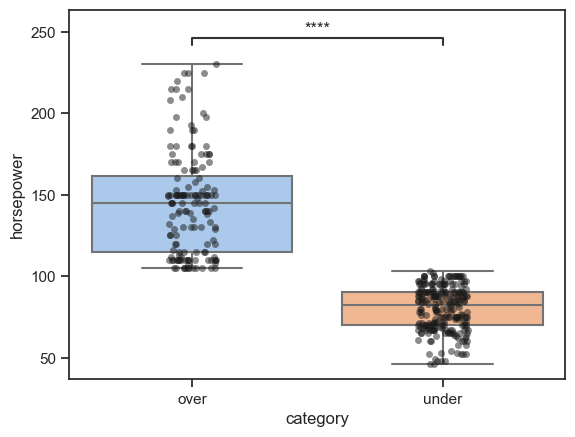

In [105]:
f1 = sns.boxplot(data=mpg, x='category', y='horsepower')
f2 = sns.stripplot(data=mpg, x='category', y='horsepower', color='k', alpha=.5)

add_stat_annotation(f1, data=mpg, x='category', y='horsepower',
                    box_pairs=[(('over'), ('under'))],
                   test='t-test_ind', text_format='star', loc='inside', verbose=2)

# test : t-test_ind, t-test_welch, t-test_paired, Mann-Whitney, Wilcoxon 등
# text_format : 'full', 'simple', 'star'

### 사후검정

In [106]:
penguins['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [107]:
d1 = penguins[penguins['species'] == 'Adelie']['body_mass_g']
d2 = penguins[penguins['species'] == 'Chinstrap']['body_mass_g']
d3 = penguins[penguins['species'] == 'Gentoo']['body_mass_g']

In [108]:
r1 = stats.ttest_ind(d1, d2)
r2 = stats.ttest_ind(d1, d3)
r3 = stats.ttest_ind(d2, d3)

In [109]:
print(r1)
print(r2)
print(r3)

Ttest_indResult(statistic=-0.4729541527980669, pvalue=0.636719081046907)
Ttest_indResult(statistic=-23.38866286971734, pvalue=2.983533605906731e-67)
Ttest_indResult(statistic=-18.824289221212233, pvalue=2.6722488647922484e-45)


In [110]:
# t-test를 연달아 3번 했으므로 pvalue에 3을 곱해준다
# r1이 1이 넘어갔다 이런 경우에는 최대값처리를 해줘야한다 
[i * 3 for i in [r1. pvalue, r2. pvalue, r3. pvalue]]

[1.910157243140721, 8.950600817720192e-67, 8.016746594376745e-45]

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Adelie v.s. Chinstrap: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-4.730e-01
Chinstrap v.s. Gentoo: t-test independent samples with Bonferroni correction, P_val=8.017e-45 stat=-1.882e+01
Adelie v.s. Gentoo: t-test independent samples with Bonferroni correction, P_val=8.951e-67 stat=-2.339e+01


(<Axes: xlabel='species', ylabel='body_mass_g'>,
  <statannot.StatResult.StatResult at 0x2523a3b26b0>])

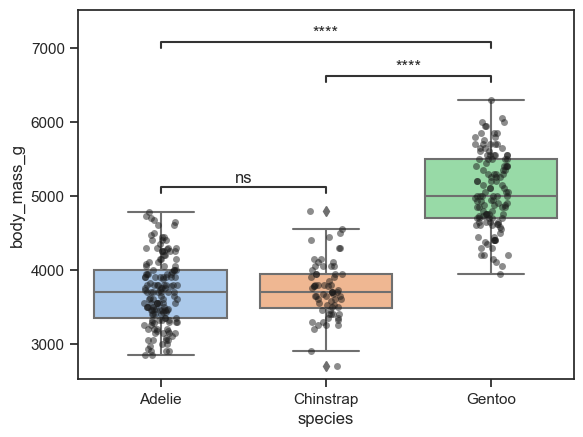

In [111]:
f1 = sns.boxplot(data=penguins, x='species', y='body_mass_g')
f2 = sns.stripplot(data=penguins, x='species', y='body_mass_g', color='k', alpha=.5)

add_stat_annotation(f1, data=penguins, x='species', y='body_mass_g',
                    box_pairs=[(('Adelie'), ('Chinstrap')), 
                               (('Adelie'), ('Gentoo')), 
                               (('Chinstrap'), ('Gentoo'))],
                   test='t-test_ind', text_format='star', loc='inside', verbose=2)